# The elevation of Earth

## Load the Python modules

We will use the `numpy` module to deal with data as arrays and we will use `matplotlib` to visualize data. These modules are imported as `np` and `plt` respectively so that we can access their functions with those codes as shorthand. Importing these different modules and remembering these shorthand codes will feel a bit cumbersome at first, but you will get used to it as the semester progresses.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Load topography data

### Inspect np.loadtxt
First we'll load the files of global topography that we will be analyzing using the ```np.loadtxt``` function. 

Before we use the function, let us have a look at its docstring. By typing the name of a function with a `?` after it, we see a description of what the function does, what parameters need to be passed to it and what additional parameters can be provided. Another way to get this same information is to press `shift+tab` after the function name.

In [2]:
np.loadtxt?

Signature:
np.loadtxt(
    fname,
    dtype=<class 'float'>,
    comments='#',
    delimiter=None,
    converters=None,
    skiprows=0,
    usecols=None,
    unpack=False,
    ndmin=0,
    encoding='bytes',
    max_rows=None,
    *,
    quotechar=None,
    like=None,
)
Docstring:
Load data from a text file.

Each row in the text file must have the same number of values.

Parameters
----------
fname : file, str, pathlib.Path, list of str, generator
    File, filename, list, or generator to read.  If the filename
    extension is ``.gz`` or ``.bz2``, the file is first decompressed. Note
    that generators must return bytes or strings. The strings
    in a list or produced by a generator are treated as lines.
dtype : data-type, optional
    Data-type of the resulting array; default: float.  If this is a
    structured data-type, the resulting array will be 1-dimensional, and
    each row will be interpreted as an element of the array.  In this
    case, the number of columns used must ma

### Load the files

There are three files: an array of latitudes (size 540 x 1; ```etopo20lats.txt'```), an array of longitudes (size 1081 x 1; ```etopo20lons.txt```), and a gridded array of topography with units of meters (size 540 x 1081; ```etopo20data.txt```). We will load the files and assign them to the variables ```lats```, ```lons```, and ```topo_grid```. Variables are names we make up that can be assigned to different Python data types — in this case numpy arrays.

These files are within the data folder that is a subfolder to the folder that this notebook is in. To load them, we need to provide the ```path``` which is a string that tells Python where the file is relative to the current directory. For the latitude file, that path is ```'data/etopo20lats.txt'```

In [3]:
lats = np.loadtxt('data/etopo20lats.txt') 
lons = np.loadtxt('data/etopo20lons.txt')
topo_grid = np.loadtxt('data/etopo20data.txt')

### Inspect the data

These data are a global model of topography (points above sea level) and bathymetry (points below sea level) generated by the National Geophysical Data Center (NGDC), an office of the National Oceanic and Atmospheric Administration (NOAA). We are using the 20 arcsecond version of the data (1/3 of a degree). Even higher resolution data are available: https://data.nodc.noaa.gov/cgi-bin/iso?id=gov.noaa.ngdc.mgg.dem:316

It helps to see the data, so let's ```print``` the latitude array and see that the numpy array is indeed an array of latitudes.

In [4]:
print(lats)

[-89.8333333 -89.5       -89.1666667 -88.8333334 -88.5000001 -88.1666668
 -87.8333335 -87.5000002 -87.1666669 -86.8333336 -86.5000003 -86.166667
 -85.8333337 -85.5000004 -85.1666671 -84.8333338 -84.5000005 -84.1666672
 -83.8333339 -83.5000006 -83.1666673 -82.833334  -82.5000007 -82.1666674
 -81.8333341 -81.5000008 -81.1666675 -80.8333342 -80.5000009 -80.1666676
 -79.8333343 -79.500001  -79.1666677 -78.8333344 -78.5000011 -78.1666678
 -77.8333345 -77.5000012 -77.1666679 -76.8333346 -76.5000013 -76.166668
 -75.8333347 -75.5000014 -75.1666681 -74.8333348 -74.5000015 -74.1666682
 -73.8333349 -73.5000016 -73.1666683 -72.833335  -72.5000017 -72.1666684
 -71.8333351 -71.5000018 -71.1666685 -70.8333352 -70.5000019 -70.1666686
 -69.8333353 -69.500002  -69.1666687 -68.8333354 -68.5000021 -68.1666688
 -67.8333355 -67.5000022 -67.1666689 -66.8333356 -66.5000023 -66.166669
 -65.8333357 -65.5000024 -65.1666691 -64.8333358 -64.5000025 -64.1666692
 -63.8333359 -63.5000026 -63.1666693 -62.833336  -62.5

The topo_grid array is more complicated than the array of latitudes. The `lats` array is 1-dimensional `[90, 89, 88,..]` while the `topo_grid` array is two dimensional with an elevation for every latitude and longitude value. We can determine the shape of the topo_grid array using `.shape`.

In [6]:
topo_grid.shape

(540, 1081)

## Visualizing the data distribution

Let's use ```matplotlib``` to visual the distribution of elevations on Earth. The elevations are within the `topo_grid` array. 

First, we need to manipulate the data a bit. We want to have a 1-dimensional list of all the (540 x 1081 = 583740) (583740) element array values to plot the distribution of elevations. We can use the numpy function ```reshape``` to do this. Instead of a grid, the data will all be in a single row after it is reshaped. To do so, we are applying a function (in this case ```reshape```) to an object (in this case the `topo_grid` object) and saving the result as a new numpy array which we will call topo_array.

In [7]:
topo_array = topo_grid.reshape(583740)

In [8]:
topo_array

array([ 2804. ,  2804. ,  2804. , ..., -4291.5, -4291.5, -4291.5])

### Plot histogram of elevation data

Now we can plot a simple histogram with the `matplotlib` function `hist` that shows the number of elevation points within a specified number of bins. Remember that we imported ```matplotlib.pyplot as plt``` so to access the ```hist``` function of matplotlib we can use ```plt.hist()```.

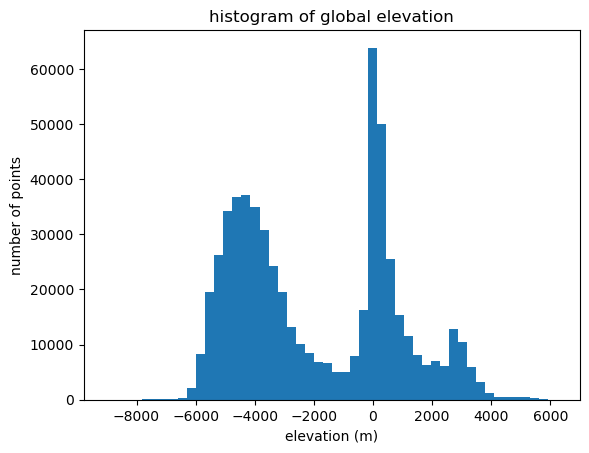

In [9]:
plt.hist(topo_array,bins=50,label='elevation data')
plt.xlabel('elevation (m)')
plt.ylabel('number of points')
plt.title('histogram of global elevation')
plt.show()

<font color=darkred>**_Discussion question:_**</font> *How would you describe the shape of this distribution of elevations?*

In [10]:
from IPython.display import YouTubeVideo
# Why Earth Has Two Levels | Hypsometric Curve
# Video credit: MinuteEarth
# Start at 3s, End at 2:25
YouTubeVideo('KOv3FGVmRcA?t=3s', width="1000", height="500")

### Calculate maximum and minimum of global elevation

Numpy has helpful functions that allow us to determine properties of data. In this case, let's investigate the minimum and maximum of the topo array (the values are in meters).

In [11]:
topo_max = np.max(topo_array)
topo_min = np.min(topo_array)
print(topo_max)
print(topo_min)

6228.8125
-9026.625


<font color=darkred>**_Discussion question:_**</font> *The summit of Mount Everest is 8,848 meters. Why is the maximum in this data set different than this?*

### Calculate mean of global elevation

<font color=goldenrod>**_Code for you to write_**</font>

Calculate the mean of ```topo_array``` using the function ```np.mean()``` and assign it to the variable ```topo_mean```. The code to do so should look like ```topo_mean = np.mean(topo_array)```

Calculate the standard deviation of ```topo_array``` using the function ```np.std()``` and assign it to the variable ```topo_sigma```.

Determine the number of elevation points in the ```topo_array``` using the function ```len()``` and assign it to the variable ```topo_n```.

In [ ]:
### Calculate the mean, standard deviation and number of points here

### Use the print() function to see the topo_mean, topo_sigma and topo_n


### Generate synthetic elevations for a hypothetical Planet Norm

Using ```topo_mean```,  ```topo_sigma```, and ```topo_n``` you calculated, let's generate synthetic elevations for a planet with a normal distribution of elevation. A normal distribution is also known as a Gaussian or a bell-curve distribution and can describe a distribution of data with a mean and a standard deviation. Let's call this made-up planet ```Planet Norm```.

The function `np.random.normal` generates random points from a normal distribution and we can specify that it has the same mean as Earth's elveation (`topo_mean`), the same standard deviation of `topo_sigma` and that as many points are drawn from the distribution as we have in the data set (`topo_n`).

In [ ]:
Planet_Norm_topo = np.random.normal(topo_mean,topo_sigma,topo_n)

In [ ]:
plt.hist(topo_array,bins=50,label='Earth elevation data',zorder=100)
plt.hist(Planet_Norm_topo,bins=50,label='Planet Norm elevation data')
plt.xlabel('elevation (m)')
plt.ylabel('number of points')
plt.title('histogram of global elevation')
plt.legend()
plt.show()

### Plot Hypsometric Curve

Another useful method of visualizing the distribution of our data is a cumulative distribution function (CDF), which for topography is called a hypsometric curve. 

The value on the hypsometric curve represents the percentage of Earth's surface with an elevation higher than the elevation at the corresponding value.

Let us sort the data by decreasing numbers using the ```sorted``` function. We can then use the ```np.linspace``` function to create a list from 0 to 100 that has the same number of points as our number of topography points.

In [12]:
sorted_topo = sorted(topo_array,reverse=True)
sorted_topo = np.asarray(sorted_topo)
percent_topo = np.linspace(0,100,len(sorted_topo))

Let use make a plot of sorted topography on the y-axis and the percent topography list on the x-axis.

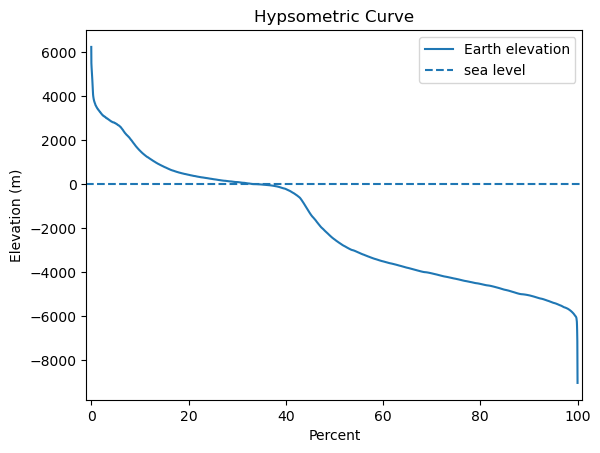

In [13]:
plt.plot(percent_topo,sorted_topo,label='Earth elevation')
plt.hlines(0,-1,101,label='sea level',linestyles='--')
plt.xlabel('Percent')
plt.ylabel('Elevation (m)')
plt.title('Hypsometric Curve')
plt.xlim(-1,101)
plt.legend(loc='best')
plt.show()

### Plot the hyposmetric curve for Planet Norm

<font color=goldenrod>**_Code for you to write_**</font>

Follow the same procedure as we did for Earth's elevation for our synthetic Planet Norm elevation to get it sorted. Be sure to give it a unique name from Earth's sorted topo (something like ```sorted_norm_topo```). Plot the Planet Norm curve on a figure along with Earth's hypsometric curve.

In [ ]:
## Generate the sort Planet Norm topo here


In [ ]:
### Make a plot with Earth data and the synthetic Planet Norm data here


<font color=goldenrod>**_Code for you to write_**</font>

We can observe where the Earth elevation and the Planet Norm hypsometric curves cross zero to determine what percentage of the planet's elevation is above sea level. Put the plotting code from above in a new cell and use the `plt.xlim()` and `plt.ylim()` functions to zoom-in on the curves and visualize where the curves cross sea level.

In [ ]:
### Change the axis bounds to determine where the curves cross 0


<font color=darkred>**_Discussion questions_**</font>

*Is there more or less land above sea level on Earth than one would expect for a normal distribution about Earth's mean elevation? Why is this the case?* 

*How does this compare to the statement made in the video clip?*

### Upload a saved version of the hypsometric curve for Earth and Planet Norm to bCourses

You can use the `plt.savefig()` function to save out the plot and then <font color=goldenrod>**_upload it to bCourses._**</font>

## Making a topographic map

Histograms and CDFs are two useful 1D visualizations of our data, but what about the distribution of topography across the globe? 

Again, we'll need to manipulate the data a bit. We need grids of latitude and longitude in order to map the topography. Like `topo_grid` they will be (size 540 x 1081). `lat_grid` will have rows of constant latitude, and `lon_grid` will have columns of constant longtiude. To do this we'll call the numpy functions `repeat`, `reshape`, and `tile`.

<img src="figures/lon_lat_grids.png">

In [14]:
# repeat the array of latitudes 1081 times
latitude =  np.repeat(lats,1081) 

# reshape that (583740,1) element array to (540,1081
lat_grid = latitude.reshape(540,1081) 

# repeat the array of longtitudes 540 times as rows
lon_grid = np.tile(lons,(540,1)) 

### Import cartopy

We are going to use the module `cartopy` to make maps using its coordinate reference tools so let use import it.

In [15]:
import cartopy.crs as ccrs

/Users/penokean/opt/anaconda3/envs/Franklin_LIP/lib/python3.10/site-packages/pyproj/__init__.py:89: UserWarning: pyproj unable to set database path.
  _pyproj_global_context_initialize()


### Use the `contourf` function to make the map

Use the grids of latitude and longtitude to plot a Robinson projection map of topography using the `cartopy` function `contourf`. This function is *slow* so do not worry if it takes a while to run.

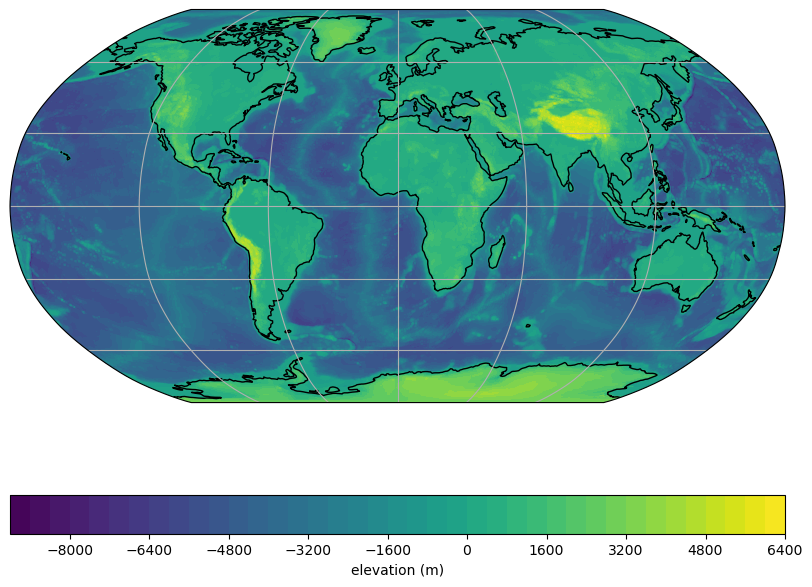

In [16]:
fig = plt.figure(figsize=(10,8))
ax = plt.axes(projection=ccrs.Robinson())
ax.set_global()
plt.contourf(lon_grid, lat_grid, topo_grid, levels=40, transform=ccrs.PlateCarree())

ax.coastlines()
ax.gridlines()

plt.colorbar(ax=ax,orientation='horizontal',label='elevation (m)')

plt.show()

### Different projections

As you now know, `cartopy` supports a number of different map projections which enable the 3 dimensional surface of Earth to be shown in 2 dimensions on our computer screens. I like the Robinson projection that we used above. As you did in the homework, go ahead and execute the cell below to see what that says about me.

In [ ]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= 'https://imgs.xkcd.com/comics/map_projections.png')

### Visualizing the shallowest and deepest parts of the ocean

Let us use the `Orthographic` projection (A GLOBE! in the above cartoon) to look at the large underwater mountain range of the Mid-Atlantic ridge. 

<font color=goldenrod>**_Code for you to write_**</font>

The code block below needs the `plt.contourf()` function to be completed. Use the version of the inputs that we used above as a guide. In addition, add the `vmax` parameter to the `plt.contourf()` function and set it equal to zero so that the colorbar only corresponds to elevations below sea level.

In [ ]:
fig = plt.figure(figsize=(15,10))
ax = plt.axes(projection=ccrs.Orthographic(central_longitude=-40,
    central_latitude=20))
ax.set_global()
plt.contourf(...)

ax.coastlines()
ax.gridlines()

plt.colorbar(ax=ax,orientation='horizontal',label='elevation (m)')

plt.show()

Let us use the `Orthographic` projection to look at the Marianas Trench. A globe centered at a longitude of 145ºE and 20ºN will work well. 

<font color=goldenrod>**_Code for you to write_**</font>

The code block below needs the `plt.axes` and `plt.contourf` function to be completed. For the `plt.axes`, use the `ccrs.Orthographic` centered at a longitude of 145ºE and 20ºN.

In [ ]:
fig = plt.figure(figsize=(15,10))
ax = plt.axes(...)
ax.set_global()
plt.contourf(...)

ax.coastlines()
ax.gridlines()

plt.colorbar(ax=ax,orientation='horizontal',label='elevation (m)')

plt.show()

<font color=darkred>**_Discussion questions_**</font>

*Where are the highest points in the ocean? What is happening there?*

*Where are the lowest points in the ocean? What is happening there?*

## Bonus maps

In [ ]:
fig = plt.figure(figsize=(15,10))
ax = plt.axes(projection=ccrs.NearsidePerspective(central_longitude=80,
    central_latitude=30,
    satellite_height=10000000))
ax.set_global()
plt.contourf(lon_grid, lat_grid, topo_grid, vmin=0, vmax=6000, 
             levels=40,transform=ccrs.PlateCarree())

ax.coastlines()
ax.gridlines()

plt.colorbar(ax=ax,orientation='horizontal',label='elevation (m)')

plt.show()

In [ ]:
from matplotlib import cm

In [ ]:
Berkeley_lat = 37.87
Berkeley_lon = -122.27
extent = [Berkeley_lon-5, Berkeley_lon+5, Berkeley_lat-5, Berkeley_lat+5]

plt.figure(figsize=(12, 12))
ax = plt.axes(projection=ccrs.AlbersEqualArea(Berkeley_lon,Berkeley_lat))
ax.set_extent(extent)
plt.contourf(lon_grid, lat_grid, topo_grid,100,
             vmin=-4000,vmax=4000,cmap=cm.BrBG_r,
             transform=ccrs.PlateCarree())
ax.coastlines(resolution='10m')
ax.gridlines()
plt.colorbar(ax=ax,orientation='horizontal',label='elevation (m)')
plt.show()